### Principal Component Analysis (PCA)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
df = pd.read_table("fruit_data_with_colors.txt")

In [51]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [52]:
x = df.drop(["fruit_label", "fruit_subtype","fruit_name"], axis = 1)

In [53]:
x.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


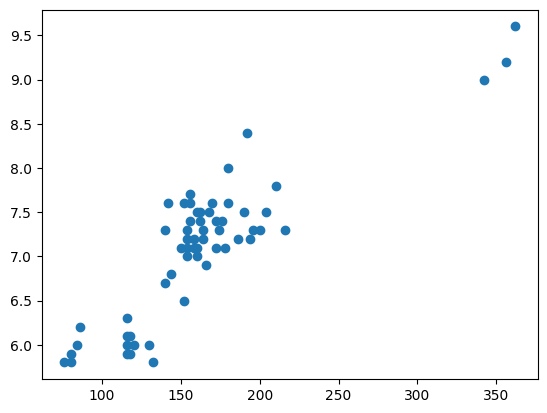

In [54]:
plt.scatter(df.mass, df.width)

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [57]:
X

array([[ 0.52944179,  1.59869024, -0.29139659, -2.79359541],
       [ 0.30946246,  1.10485399, -0.66192242, -2.26868417],
       [ 0.23613601,  0.36409961, -0.36550175, -2.13745636],
       [-1.41370901, -1.11740915, -2.21813091,  0.48709984],
       [-1.45037224, -1.36432727, -2.29223608,  0.35587203],
       [-1.52369868, -1.6112454 , -2.51455158,  0.09341641],
       [-1.52369868, -1.48778634, -2.51455158,  0.61832765],
       [-1.59702513, -1.6112454 , -2.73686708,  0.61832765],
       [ 0.27279923, -0.00627758,  0.07912925,  2.06183356],
       [ 0.16280957,  0.36409961, -0.51371209,  1.66815013],
       [ 0.0528199 , -0.25319571, -0.29139659,  2.19306137],
       [ 0.16280957, -0.00627758, -0.06908109,  2.06183356],
       [-0.16715944, -0.12973664, -0.43960692,  1.53692232],
       [ 0.01615667,  0.24064055,  0.00502408, -0.82517826],
       [-0.20382266,  0.61101774, -0.29139659, -0.95640607],
       [-0.13049622,  0.7344768 , -0.43960692, -0.95640607],
       [-0.13049622,  0.

In [58]:
pca = PCA(n_components= 2)

In [59]:
x_pca = pca.fit_transform(X)
x_pca

array([[ 1.57216938, -1.98004398],
       [ 0.87841688, -1.5793734 ],
       [ 0.52977322, -1.73289051],
       [-2.71261023,  0.41467382],
       [-2.89341158,  0.24200292],
       [-3.14907175, -0.0227446 ],
       [-3.16435024,  0.48979866],
       [-3.39197004,  0.49705157],
       [-0.1337842 ,  1.92251073],
       [-0.21783491,  1.77601184],
       [-0.61983992,  2.02528232],
       [-0.27623512,  1.93637892],
       [-0.65153341,  1.44776118],
       [ 0.28790153, -0.6930091 ],
       [ 0.23873686, -0.69117127],
       [ 0.28247682, -0.61002894],
       [ 0.40154031, -0.95274558],
       [ 0.37479841, -0.23727398],
       [-0.09457474,  1.03234545],
       [-0.17247687,  1.2237516 ],
       [-0.03541549,  1.31528018],
       [-0.14616449,  1.04663218],
       [-0.57656054,  1.37171952],
       [ 0.2545604 ,  1.55238094],
       [ 4.06190602,  0.7801176 ],
       [ 4.29183685,  0.92853405],
       [ 4.66783223,  0.95558303],
       [ 1.28997005,  0.08988633],
       [-0.67982451,

In [60]:
first_component = x_pca[:, 0]
second_component = x_pca[:, 1]

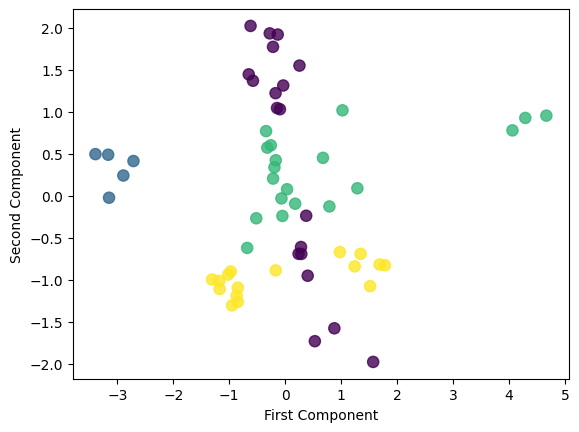

In [61]:
plt.scatter(first_component, second_component, s= 65, c= df.fruit_label, alpha = 0.8)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()

In [62]:
df.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

### K Means Clustering Algorithm

In [63]:
from sklearn.cluster import KMeans

In [64]:
# Initialize Kmeans 
KM = KMeans(n_clusters= 4, random_state= 30)

In [65]:
KM.fit(x_pca)

KMeans(n_clusters=4, random_state=30)

In [66]:
KM.labels_

array([3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

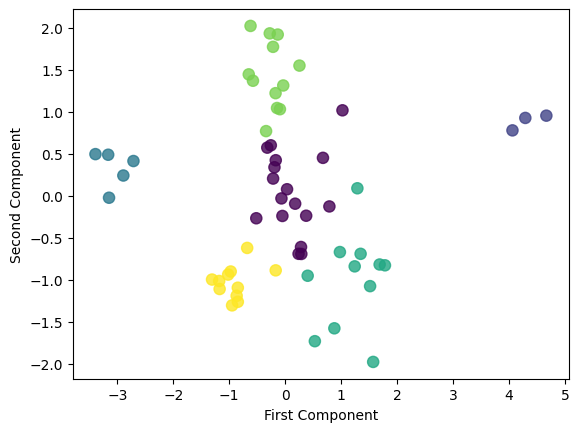

In [76]:
plt.scatter(first_component, second_component, s= 65, c= KM.labels_, alpha = 0.8)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()

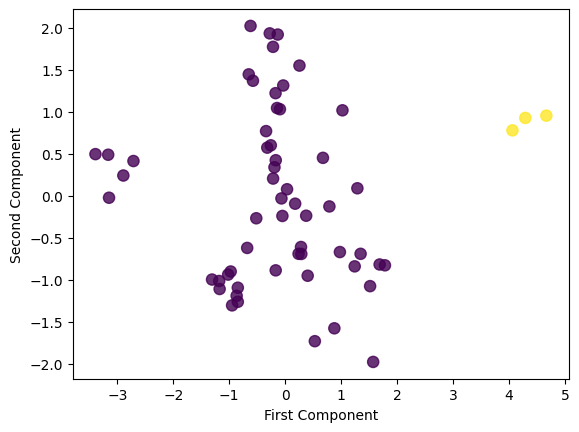

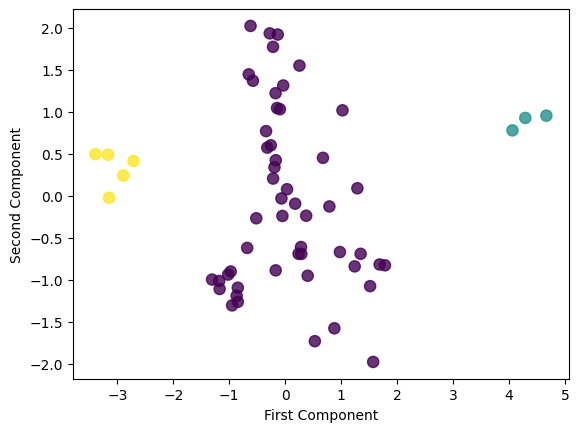

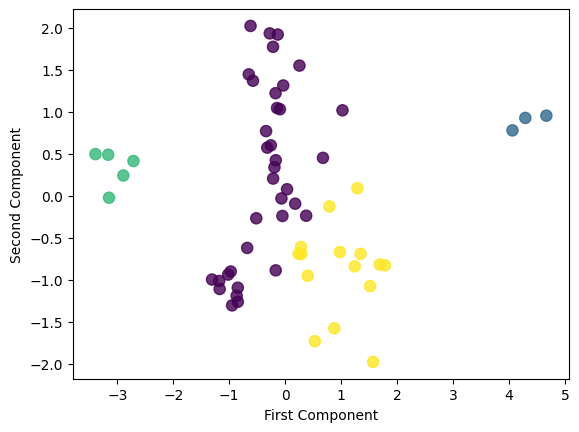

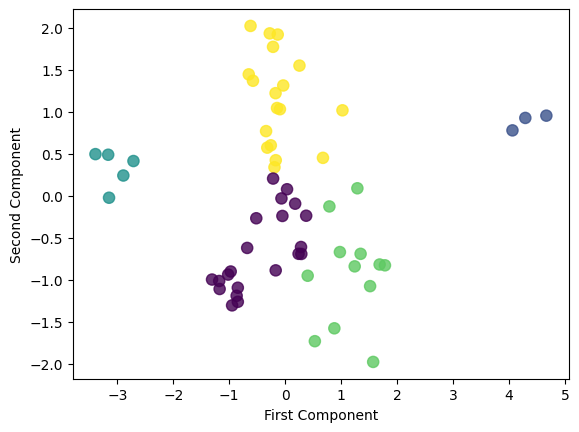

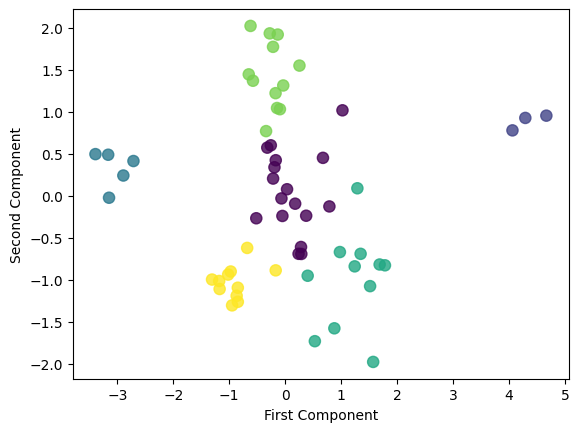

In [77]:
for i in range(2, 7):
    KM = KMeans(n_clusters= i, random_state= 30)
    KM.fit(x_pca)
    plt.scatter(first_component, second_component, s= 65, c= KM.labels_ , alpha = 0.8)
    plt.xlabel("First Component")
    plt.ylabel("Second Component")
    plt.show()